In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data organised in folders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path=r'./NEU Metal Surface Defects Data' #for desktop

In [ ]:
# # accessing data from colab
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# folder path
path=r'/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data'

In [ ]:
#exploring folder

In [7]:
os.listdir(path)

['Thumbs.db', 'train', 'test', 'valid']

In [8]:
os.listdir(path+'/train')

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']

In [9]:
classes_defects=os.listdir(path+'/train')
print(classes_defects)
print(type(classes_defects))

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
<class 'list'>


In [10]:
os.listdir(path+'/train/Patches')[:10]

['Pa_206.bmp',
 'Pa_165.bmp',
 'Pa_145.bmp',
 'Pa_156.bmp',
 'Pa_226.bmp',
 'Pa_243.bmp',
 'Pa_209.bmp',
 'Pa_195.bmp',
 'Pa_131.bmp',
 'Pa_16.bmp']

In [11]:
from PIL import Image

In [12]:
img1=Image.open(path+'/train/Patches/Pa_206.bmp')
print(img1.filename)
print(img1.format)
print(img1.mode)
print(img1.size)

# # The "L" mode represents grayscale here.... So it can hold any of 256 shades of Gray 
# (includes black and white as Gray shades).
# # The "P" mode can hold 256 different colors like red,blue, green etc....
# https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=Examples%3A%208%20bit%20black%20and,are%20%22P%22%20mode..

/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data/train/Patches/Pa_206.bmp
BMP
L
(200, 200)


In [13]:
image=plt.imread(path+'/train/Patches/Pa_206.bmp')


(200, 200)
max_pixel_value: 255


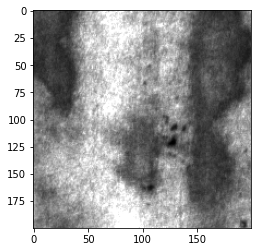

In [14]:
print(image.shape)
plt.imshow(image,cmap='gray')
print("max_pixel_value: {}".format(image.max()))

In [15]:
image_height=200
image_width=200
batch_size=16

In [ ]:
#ImageDataGenerator and flow_from_directory for datasets

In [ ]:
# # https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

# https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/TensorFlow/Basics/tutorial18-customdata-images/1_in_subfolders.py

In [16]:
data_generator=ImageDataGenerator(
    rescale=1.0/255,
    dtype=tf.float32,
    
)

In [17]:
train_ds=data_generator.flow_from_directory(
    path+'/train',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 1667 images belonging to 6 classes.


In [18]:
valid_ds=data_generator.flow_from_directory(
    path+'/valid',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [19]:
test_ds=data_generator.flow_from_directory(
    path+'/test',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=False,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [ ]:
# exploring datsets

In [20]:
import numpy as np

In [21]:
print(len(train_ds[0]))

2


In [22]:
print(len(train_ds[0][0]))

16


In [23]:
print(train_ds[0][0].shape)

(16, 200, 200, 3)


(16, 200, 200, 3)
3.0
['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
{'Inclusion': 0, 'Patches': 1, 'Crazing': 2, 'Pitted': 3, 'Scratches': 4, 'Rolled': 5}
tf.Tensor([3 0 5 3 0 3 0 5 4 2 0 3 4 3 0 1], shape=(16,), dtype=uint8)
Pitted


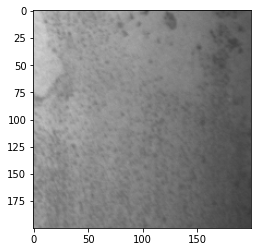

In [24]:
for images,labels in train_ds:
  plt.imshow(images[0],cmap='gray')
  print(images.shape)
  print(labels[0])
  labels=tf.cast(labels,tf.uint8)
  print(classes_defects)
  print(train_ds.class_indices)
  print((labels))
  print(classes_defects[labels[0]])
  break

In [ ]:
#Pretrained models keras

In [ ]:
# https://keras.io/api/applications/

In [ ]:
# https://towardsdatascience.com/transfer-learning-for-image-classification-using-tensorflow-71c359b56673

# **VGG16 with include_top=False, trainable=false and no augmentation**

In [25]:
from tensorflow.keras.applications import VGG16

In [26]:
feature_extractor=VGG16(include_top=False,input_shape=(200,200,3))
feature_extractor.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [28]:
input_=tf.keras.Input(shape=(200,200,3))
x=feature_extractor(input_,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [29]:
model=keras.Model(input_,output_)

In [30]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

In [31]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [32]:
history=model.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 377s 3s/step - loss: 1.6109 - accuracy: 0.4265 - val_loss: 1.4016 - val_accuracy: 0.5833
Epoch 2/50
105/105 [==============================] - 8s 71ms/step - loss: 1.3002 - accuracy: 0.6101 - val_loss: 1.0986 - val_accuracy: 0.7500
Epoch 3/50
105/105 [==============================] - 8s 72ms/step - loss: 1.0409 - accuracy: 0.6983 - val_loss: 0.8536 - val_accuracy: 0.7778
Epoch 4/50
105/105 [==============================] - 8s 72ms/step - loss: 0.8338 - accuracy: 0.7385 - val_loss: 0.6599 - val_accuracy: 0.8611
Epoch 5/50
105/105 [==============================] - 8s 72ms/step - loss: 0.6700 - accuracy: 0.8536 - val_loss: 0.5157 - val_accuracy: 0.9306
Epoch 6/50
105/105 [==============================] - 8s 73ms/step - loss: 0.5439 - accuracy: 0.9232 - val_loss: 0.4027 - val_accuracy: 0.9861
Epoch 7/50
105/105 [==============================] - 8s 74ms/step - loss: 0.4483 - accuracy: 0.9448 - val_loss: 0.3199 - val_accuracy: 0.9861

In [33]:
model.evaluate(test_ds)

5/5 [==============================] - 14s 3s/step - loss: 0.0364 - accuracy: 0.9861


[0.03642109036445618, 0.9861111044883728]

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

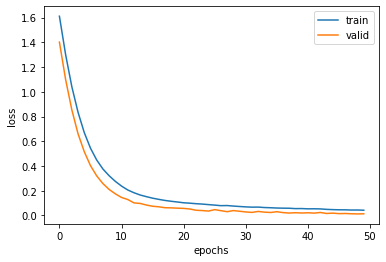

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

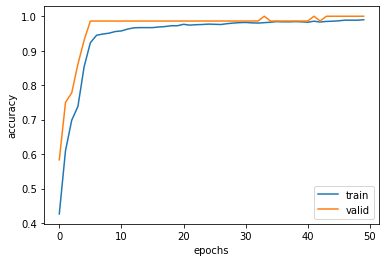

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

# **VGG16 with include_top=False, trainable=false and augmentation**

In [51]:
feature_extractor2=VGG16(include_top=False,input_shape=(200,200,3))
feature_extractor2.trainable=False

In [52]:
data_aug2=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           #layers.experimental.preprocessing.Resizing(height=224,width=224),
                           layers.experimental.preprocessing.RandomContrast(factor=0.25),
                           layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                           layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                           layers.experimental.preprocessing.RandomRotation(0.5),
                           layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [53]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug2(input_,training=False)
x=feature_extractor2(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [54]:
model2=keras.Model(input_,output_)

In [55]:
print(model2.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                           

In [56]:
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [45]:
history2=model2.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 8s 74ms/step - loss: 1.7256 - accuracy: 0.2388 - val_loss: 1.5649 - val_accuracy: 0.3333
Epoch 2/50
105/105 [==============================] - 8s 72ms/step - loss: 1.4625 - accuracy: 0.4811 - val_loss: 1.2982 - val_accuracy: 0.6528
Epoch 3/50
105/105 [==============================] - 8s 74ms/step - loss: 1.1868 - accuracy: 0.7349 - val_loss: 0.9563 - val_accuracy: 0.8750
Epoch 4/50
105/105 [==============================] - 8s 72ms/step - loss: 0.8838 - accuracy: 0.8530 - val_loss: 0.6568 - val_accuracy: 0.9722
Epoch 5/50
105/105 [==============================] - 8s 74ms/step - loss: 0.6411 - accuracy: 0.9064 - val_loss: 0.4342 - val_accuracy: 0.9861
Epoch 6/50
105/105 [==============================] - 8s 73ms/step - loss: 0.4667 - accuracy: 0.9334 - val_loss: 0.2855 - val_accuracy: 0.9861
Epoch 7/50
105/105 [==============================] - 8s 73ms/step - loss: 0.3571 - accuracy: 0.9340 - val_loss: 0.2103 - val_accuracy: 0.9861

In [46]:
model2.evaluate(test_ds)

5/5 [==============================] - 0s 74ms/step - loss: 0.0247 - accuracy: 1.0000


[0.024712661281228065, 1.0]

In [47]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

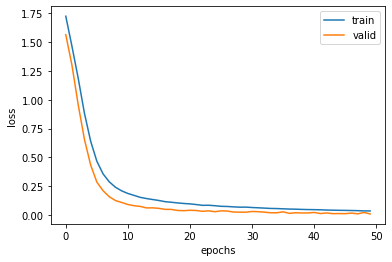

In [49]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

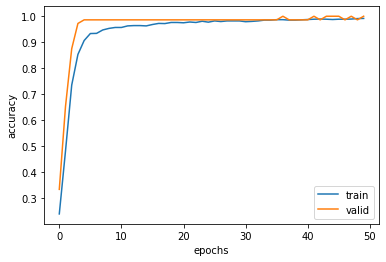

In [50]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

# **VGG16 with include_top=True, trainable=True and no augmentation**



In [57]:
feature_extractor3=VGG16(include_top=True,weights='imagenet',input_shape=(224,224,3))
feature_extractor3.trainable=True

553476096/553467096 [==============================] - 3s 0us/step


In [58]:
data_aug=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           layers.experimental.preprocessing.Resizing(height=224,width=224),
                          #  layers.experimental.preprocessing.RandomContrast(factor=0.25),
                          #  layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                          #  layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                          #  layers.experimental.preprocessing.RandomRotation(0.5),
                          #  layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [60]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug(input_)
x=feature_extractor3(x)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [61]:
model3=keras.Model(input_,output_)

In [62]:
print(model3.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense_12 (Dense)            (None, 128)               128128    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 6)                 198 

In [63]:
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [64]:
history3=model3.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 34s 274ms/step - loss: 1.7906 - accuracy: 0.1824 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 2/50
105/105 [==============================] - 26s 246ms/step - loss: 1.7921 - accuracy: 0.1608 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7919 - accuracy: 0.1554 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/50
105/105 [==============================] - 26s 249ms/step - loss: 1.7919 - accuracy: 0.1662 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/50
105/105 [==============================] - 27s 253ms/step - loss: 1.7920 - accuracy: 0.1578 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/50
105/105 [==============================] - 26s 251ms/step - loss: 1.7919 - accuracy: 0.1596 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/50
105/105 [==============================] - 26s 251ms/step - loss: 1.7920 - accuracy: 0.1566 - val_loss: 1.7918 - val_ac

In [65]:
model3.evaluate(test_ds)

5/5 [==============================] - 0s 80ms/step - loss: 1.7918 - accuracy: 0.1667


[1.791761875152588, 0.1666666716337204]

In [66]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

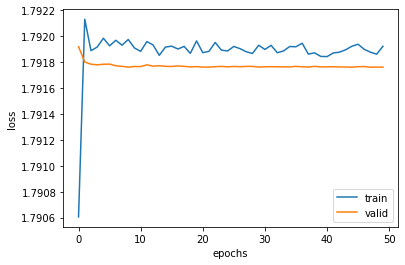

In [68]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

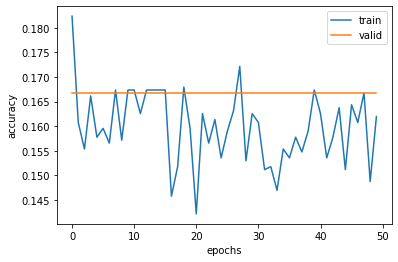

In [69]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

# **VGG16 with include_top=True, trainable=True and augmentation** 

In [103]:
feature_extractor4=VGG16(include_top=True,weights='imagenet',input_shape=(224,224,3))
feature_extractor4.trainable=True

In [104]:
data_aug=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           layers.experimental.preprocessing.Resizing(height=224,width=224),
                           layers.experimental.preprocessing.RandomContrast(factor=0.25),
                           layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                           layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                           layers.experimental.preprocessing.RandomRotation(0.5),
                           layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [105]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug(input_)
x=feature_extractor4(x,training=True)
#x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [106]:
model4=keras.Model(input_,output_)

In [107]:
print(model4.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense_32 (Dense)            (None, 128)               128128    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 6)                 198 

In [110]:
model4.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.SGD(0.005),
              metrics=['accuracy'])

In [111]:
history4=model4.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 28s 249ms/step - loss: 1.7917 - accuracy: 0.1578 - val_loss: 1.7909 - val_accuracy: 0.2778
Epoch 2/50
105/105 [==============================] - 27s 254ms/step - loss: 1.7909 - accuracy: 0.2232 - val_loss: 1.7898 - val_accuracy: 0.3333
Epoch 3/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7893 - accuracy: 0.2436 - val_loss: 1.7875 - val_accuracy: 0.3333
Epoch 4/50
105/105 [==============================] - 26s 247ms/step - loss: 1.7867 - accuracy: 0.3239 - val_loss: 1.7846 - val_accuracy: 0.3889
Epoch 5/50
105/105 [==============================] - 26s 250ms/step - loss: 1.7824 - accuracy: 0.3491 - val_loss: 1.7787 - val_accuracy: 0.4028
Epoch 6/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7749 - accuracy: 0.3839 - val_loss: 1.7682 - val_accuracy: 0.3472
Epoch 7/50
105/105 [==============================] - 26s 248ms/step - loss: 1.7620 - accuracy: 0.3755 - val_loss: 1.7553 - val_ac

In [112]:
model4.evaluate(test_ds)

5/5 [==============================] - 0s 80ms/step - loss: 0.3321 - accuracy: 1.0000


[0.3321087658405304, 1.0]

In [113]:
history4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

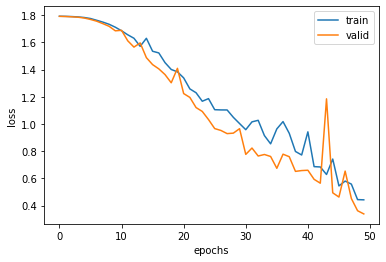

In [115]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

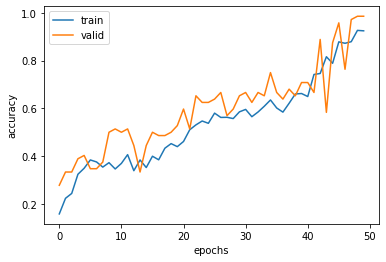

In [116]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['train','valid'])

In [ ]:
# feature_extractor=ResNet50(weights='imagenet',input_shape=(200,200,3))
# feature_extractor.trainable=True

ValueError: ignored